<a href="https://colab.research.google.com/github/zi-onion/24-2-ESAA/blob/Project/OB1_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **월간 데이콘 소설 작가 분류 AI 경진대회**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **라이브러리**

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import nltk
import string
import numpy as np

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

## **데이터 로드**

In [ ]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/프로젝트2/데이터/train.csv')
test=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/프로젝트2/데이터/test_x.csv')
sample_submission=pd.read_csv('/content/drive/MyDrive/24-2/ESAA/프로젝트2/데이터/sample_submission.csv')

In [ ]:
train.info() ## null값 없음
test.info() ## null값 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54879 entries, 0 to 54878
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   54879 non-null  int64 
 1   text    54879 non-null  object
 2   author  54879 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19617 entries, 0 to 19616
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   19617 non-null  int64 
 1   text    19617 non-null  object
dtypes: int64(1), object(1)
memory usage: 306.6+ KB


In [ ]:
train

,index,text,author
0,0,"He was almost choking. There was so much, so m...",3
1,1,"“Your sister asked for it, I suppose?”",2
2,2,"She was engaged one day as she walked, in per...",1
3,3,"The captain was in the porch, keeping himself ...",4
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3
...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2
54875,54875,"I told my plan to the captain, and between us ...",4
54876,54876,"""Your sincere well-wisher, friend, and sister...",1
54877,54877,“Then you wanted me to lend you money?”,3


In [ ]:
test

,index,text
0,0,“Not at all. I think she is one of the most ch...
1,1,"""No,"" replied he, with sudden consciousness, ""..."
2,2,As the lady had stated her intention of scream...
3,3,“And then suddenly in the silence I heard a so...
4,4,His conviction remained unchanged. So far as I...
...,...,...
19612,19612,"At the end of another day or two, odin growing..."
19613,19613,"All afternoon we sat together, mostly in silen..."
19614,19614,"odin, having carried his thanks to odin, proc..."
19615,19615,"Soon after this, upon odin's leaving the room,..."


## **데이터 전처리**

In [ ]:
# 축약형 변환
contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
# POS 태그를 WordNet 형식으로 변환하는 함수
def get_wordnet_pos(tag):
  tag_dict = {
      'J': wordnet.ADJ,   # 형용사
      'N': wordnet.NOUN,  # 명사
      'V': wordnet.VERB,  # 동사
      'R': wordnet.ADV    # 부사
      }
  return tag_dict.get(tag[0], wordnet.NOUN)  # 기본값: 명사

In [ ]:
def text_preprocessing(text):
    # 1. 축약형 확장
    for contraction, expanded in contractions.items():
        text = re.sub(rf"{re.escape(contraction)}\b", expanded, text)

    # 2. 소문자 변환
    text = text.lower()

    # 3. 소유격 제거
    text = re.sub(r"\b(\w+)'s\b|\b(\w+)'\b", r"\1", text)

    # 4. 괄호로 닫힌 문자열 제거
    text = re.sub(r"\([^)]*\)", "", text)

    # 5. 특수문자 제거
    text = re.sub('[^a-zA-Z\s]', ' ', text)

    # 6. 다중 공백 제거
    text = re.sub(r'\s+', ' ', text).strip()

    # 7. Word Tokenization
    tokens = word_tokenize(text)

    # 8. Stopword 제거
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # 9. 품사 태깅
    pos_tags = pos_tag(filtered_tokens)

    # 10. Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return lemmatized_tokens

In [ ]:
train['Cleaned_Text']=train['text'].apply(text_preprocessing)
test['Cleaned_Text']=test['text'].apply(text_preprocessing)

In [ ]:
train

,index,text,author,Cleaned_Text
0,0,"He was almost choking. There was so much, so m...",3,"[almost, choke, much, much, want, say, strange..."
1,1,"“Your sister asked for it, I suppose?”",2,"[sister, ask, suppose]"
2,2,"She was engaged one day as she walked, in per...",1,"[engage, one, day, walk, peruse, jane, last, l..."
3,3,"The captain was in the porch, keeping himself ...",4,"[captain, porch, keep, carefully, way, treache..."
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,"[mercy, gentleman, odin, flung, hand, write, a..."
...,...,...,...,...
54874,54874,"“Is that you, Mr. Smith?” odin whispered. “I h...",2,"[mr, smith, odin, whisper, hardly, dare, hope,..."
54875,54875,"I told my plan to the captain, and between us ...",4,"[tell, plan, captain, u, settle, detail, accom..."
54876,54876,"""Your sincere well-wisher, friend, and sister...",1,"[sincere, well, wisher, friend, sister, lucy, ..."
54877,54877,“Then you wanted me to lend you money?”,3,"[want, lend, money]"


In [ ]:
test

,index,text,Cleaned_Text
0,0,“Not at all. I think she is one of the most ch...,"[think, one, charm, young, lady, ever, meet, m..."
1,1,"""No,"" replied he, with sudden consciousness, ""...","[reply, sudden, consciousness, find, ignorant,..."
2,2,As the lady had stated her intention of scream...,"[lady, state, intention, scream, course, would..."
3,3,“And then suddenly in the silence I heard a so...,"[suddenly, silence, heard, sound, send, heart,..."
4,4,His conviction remained unchanged. So far as I...,"[conviction, remain, unchanged, far, know, bel..."
...,...,...,...
19612,19612,"At the end of another day or two, odin growing...","[end, another, day, two, odin, grow, visibly, ..."
19613,19613,"All afternoon we sat together, mostly in silen...","[afternoon, sit, together, mostly, silence, wa..."
19614,19614,"odin, having carried his thanks to odin, proc...","[odin, carried, thanks, odin, proceed, happine..."
19615,19615,"Soon after this, upon odin's leaving the room,...","[soon, upon, odin, leave, room, mama, say, odi..."


**스톱워드 제거**
* `nltk.download('stopwords')` ✅
* `spacy.load('en_core_web_sm')`

**Lemmatizer**
* 품사 태깅 o ✅ 원형으로 변형이 더 잘된다. 오래 걸린다.
* 품사 태깅 x

**품사 태깅 함수**
1. `tag[0]`이 `J`, `V`, `R`에 없을 경우 기본값인 `wordnet.NOUN` 반환
* 단어가 명사로 처리될 경우 원형을 그대로 반환한다.
2. 품사가 제대로 태깅된 경우, 정확히 해당 품사로 Lemmatization이 수행되므로 명사 이외의 품사 형태로 변환된다.


## **Feature Engineering**

### **1. (지인) 단어 개수, 평균 단어 길이, unique 단어 개수**

In [ ]:
# tokenizer 함수 정의
def get_words(text):
    words = nltk.tokenize.word_tokenize(text)
    return [word for word in words if not word in string.punctuation]

def count_tokens(text, tokens):
    return sum([w in tokens for w in get_words(text)])

In [ ]:
# 단어 개수
train['num_words']=train['text'].apply(lambda x:len(get_words(x)))
test['num_words']=test['text'].apply(lambda x:len(get_words(x)))

# 평균 단어 길이
train['mean_word_len']=train['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))
test['mean_word_len']=test['text'].apply(lambda x:np.mean([len(w) for w in str(x).split()]))

# unique 단어 개수
train["num_unique_words"] = train["text"].apply(lambda x: len(set(str(x).split())))
test["num_unique_words"] = test["text"].apply(lambda x: len(set(str(x).split())))

### **2. (민정) stopwords 개수, (명사, 형용사, 동사) 개수**

In [ ]:
# stopwords 개수
stop_words = stopwords.words('english')
train['num_stopwords'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))
test['num_stopwords'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

In [ ]:
# (명사, 형용사, 동사) 개수 함수 정의
def fraction_noun(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])

        return (noun_count/word_count)

def fraction_adj(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        adj_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])

        return (adj_count/word_count)

def fraction_verbs(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    word_count = text_splited.__len__()
    if word_count==0:
        return 0
    else:
        pos_list = nltk.pos_tag(text_splited)
        verbs_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])

        return (verbs_count/word_count)

In [ ]:
# 명사 개수
train['noun'] = train["text"].apply(lambda x: fraction_noun(x))
test['noun'] = test["text"].apply(lambda x: fraction_noun(x))

# 형용사 개수
train['adj'] = train["text"].apply(lambda x: fraction_adj(x))
test['adj'] = test["text"].apply(lambda x: fraction_adj(x))

# 동사 개수
train['verbs'] = train["text"].apply(lambda x: fraction_verbs(x))
test['verbs'] = test["text"].apply(lambda x: fraction_verbs(x))

### **3. (다정) 문장부호 개수**

$$비율=\frac{문장부호를 포함한 단어 수}{문장 내 단어 수}\times100$$

예) 문장 길이 = 5, 문장부호를 포함한 단어 수 = 2
$$비율=\frac{2}{5}\times100=40%$$

* `punc_1` : 세미콜론, 콜론 포함 단어 비율
* `punc_2` : 콤마, 마침표 포함 단어 비율
* `punc_3` : 물음표 포함 단어 비율
* `punc_4` : 작은따옴표 포함 단어 비율
* `punc_5` : 큰따옴표 포함 단어 비율
* `punc_6` : 모든 구두점 포함 단어 비율

In [ ]:
# 문장부호 정의
punctuations = [{"id":1,"p":"[;:]"},{"id":2,"p":"[,.]"},{"id":3,"p":"[?]"},{"id":4,"p":"[\']"},{"id":5,"p":"[\"]"},{"id":6,"p":"[;:,.?\'\"]"}]

# 반복문으로 문장부호 변수 생성
for p in punctuations:
    punctuation = p["p"]
    _train =  [ sentence.split() for sentence in train['text'] ]
    train['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _train]

    _test =  [ sentence.split() for sentence in test['text'] ]
    test['punc_'+str(p["id"])] = [len([word for word in sentence if bool(re.search(punctuation, word))])*100.0/len(sentence) for sentence in _test]

### **4. (지원) sentiment score, FRES**

**SentimentScore** (on a -1 to 1 scale)

* 1에 가까운 점수는 긍정적인 감정
* -1에 가까운 점수는 부정적인 감정
* 0에 가까운 점수는 해당 감정이 긍정적이지도 부정적이지도 않음을 나타냄

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def sentiment_nltk(text):
    res = SentimentIntensityAnalyzer().polarity_scores(text)
    return res['compound']

In [ ]:
train["sentiment"]=train["text"].apply(sentiment_nltk)
test["sentiment"]=test["text"].apply(sentiment_nltk)

**FRES(Flesch Reading Ease)** : 가독성 테스트

1. 텍스트의 단어, 음절, 문장 수를 셈.
2. 문장당 평균 단어 수와 단어당 평균 음절 수를 계산

--> "짧은 단어와 짧은 문장이 읽기 쉽다"의 원리

점수가 높을수록 텍스트를 이해하기가 더 쉬움을 의미.


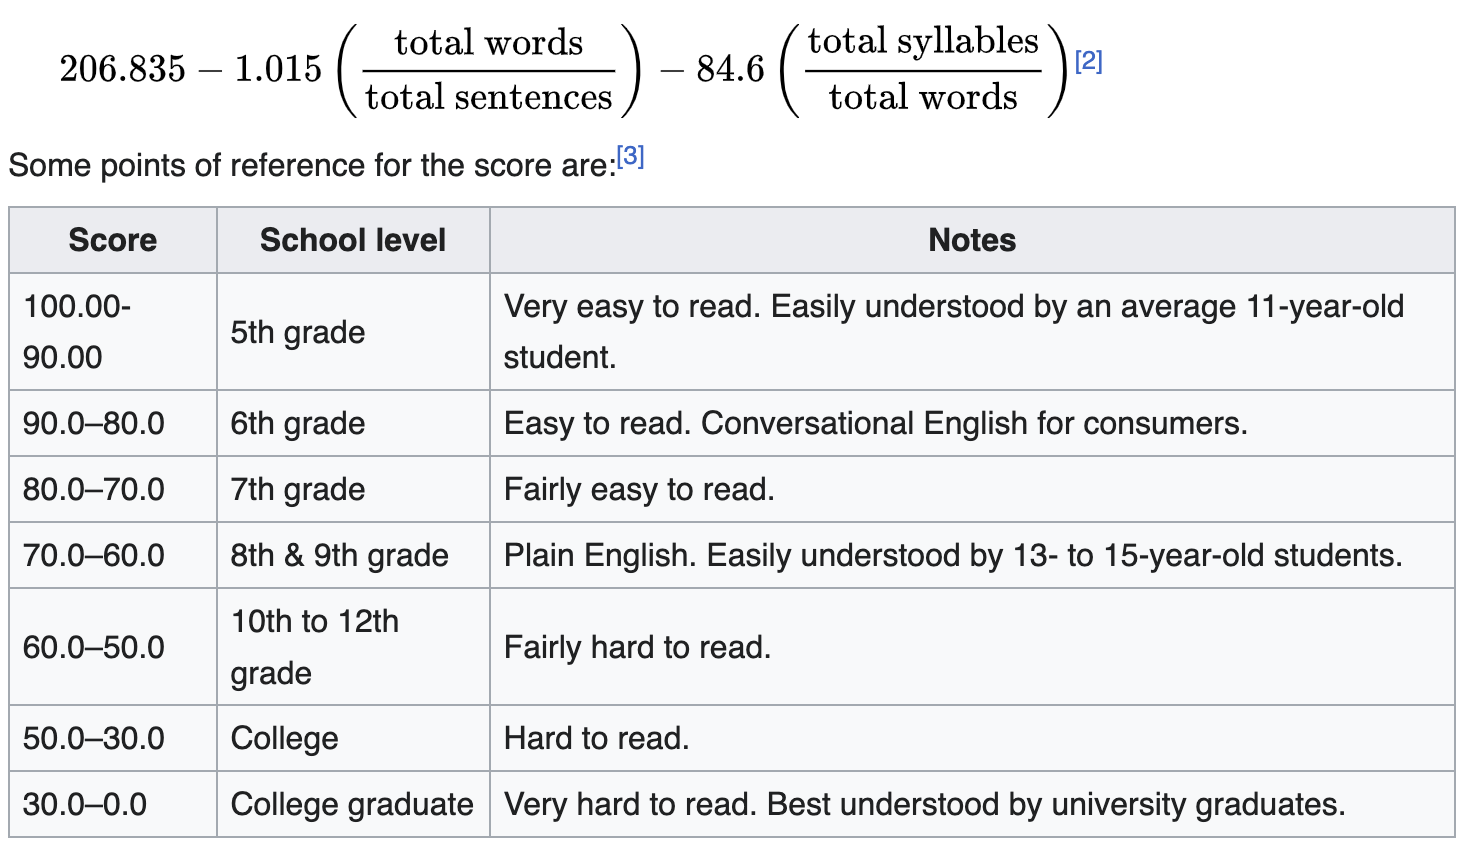


가장 높은 점수는 121.22, 어려운 문장은 음수로 표현되어 하한이 없음.

In [ ]:
!pip install textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 28.5 MB/s eta 0:00:00


In [ ]:
from textstat import flesch_reading_ease

train['FRES']=train['text'].apply(flesch_reading_ease)
test['FRES']=test['text'].apply(flesch_reading_ease)

## **전처리 결과 확인**

In [ ]:
train.columns

Index(['index', 'text', 'author', 'Cleaned_Text', 'num_words', 'mean_word_len',
       'num_unique_words', 'noun', 'adj', 'verbs', 'num_stopwords', 'punc_1',
       'punc_2', 'punc_3', 'punc_4', 'punc_5', 'punc_6', 'sentiment', 'FRES',
       'num_chars'],
      dtype='object')

In [ ]:
print(train.shape)
print(test.shape)

(54879, 19)
(19617, 18)


## **Vectorization**

### **CountVectorizer**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 전처리 완료된 데이터 (토큰화된 리스트 형태)
train = pd.read_csv('train2.csv')
test = pd.read_csv('test2.csv')

# 리스트를 문자열로 변환
text_data = [''.join(tokens) for tokens in train['Cleaned_Text']]

# CountVectorizer 초기화 및 적용
cnt_vect = CountVectorizer(lowercase=False)
X = cnt_vect.fit_transform(text_data)

# 결과 확인
print('학습 데이터 텍스트의 CountVectorizer Shape:', X.shape)
print("Feature Names:", cnt_vect.get_feature_names_out())
print("Sparse Matrix:\n", X.toarray())

학습 데이터 텍스트의 CountVectorizer Shape: (54879, 27319)
Feature Names: ['aaron' 'ab' 'abace' ... 'zum' 'zurich' 'zz']
Sparse Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
feature_name = cnt_vect.get_feature_names_out()
feature_name_df = pd.DataFrame(data=feature_name)
feature_name_df

,0
0,aaron
1,ab
2,abace
3,aback
4,abaft
...,...
27314,zoology
27315,zossimov
27316,zum
27317,zurich


### **TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Cleaned_Text를 문자열 형태로 결합
train['Cleaned_Text_Joined'] = train['Cleaned_Text'].apply(lambda x: ' '.join(x))
test['Cleaned_Text_Joined'] = test['Cleaned_Text'].apply(lambda x: ' '.join(x))

# TF-IDF Vectorizer 초기화
tfidf_vectorizer = TfidfVectorizer(
    stop_words=stopwords.words('english'),  # 영어 불용어 제거
    ngram_range=(1, 3),  # unigram 및 bigram 사용
    min_df=50
)

# TF-IDF 학습 및 변환
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Cleaned_Text_Joined'])
X_test_tfidf = tfidf_vectorizer.transform(test['Cleaned_Text_Joined'])

# TF-IDF 변환 결과 출력
print(f"훈련 데이터 TF-IDF 행렬 크기: {X_train_tfidf.shape}")
print(f"테스트 데이터 TF-IDF 행렬 크기: {X_test_tfidf.shape}")

훈련 데이터 TF-IDF 행렬 크기: (54879, 3276)
테스트 데이터 TF-IDF 행렬 크기: (19617, 3276)


### **Word2Vec**

In [ ]:
from gensim.models import Word2Vec

train_text = train['Cleaned_Text'].tolist()

w2v = Word2Vec(sentences=train_text, vector_size=100, window=5, min_count=1, sg=0, workers=4)

# 재사용을 위해 모델 저장
w2v.save("word2vec_trian.model")

- `sg`: CBOW(0), Skep-gram(1)
- `workers`: # of CPU

In [ ]:
w2v.wv.vectors.shape

(27340, 100)

- 27,340개 단어
- 각 단어 벡터: 100차원

In [ ]:
import numpy as np
def sentence_to_vector(sentence, model, vector_size):
    vectors = [model.wv[word] for word in sentence if word in model.wv] # test data 중 모르는 단어 존재할 수 있음
    if len(vectors) > 0:
        return np.mean(vectors, axis=0) # word별 벡터의 평균을 구해서 하나의 벡터로 변환
    else:
        return np.zeros(vector_size)

📌 **`text` column ➡️ word별 벡터의 평균으로 표현**
- 한 row(한 구절)의 모든 단어의 의미를 종합적으로 나타내기 위한 방법

  ✔️ **장점**
  - 구현 쉽고 빠른 계산
  - Word2Vec 임베딩 모델 그대로 활용 가능

  ✔️ **단점**
  - 단어의 순서, 문맥 반영 ❌
  - 길이가 긴 문장의 의미 희석될 가능성
- **다른 방법**
  - **TF-IDF 가중 평균**: 평균 계산 시 가중치를 반영(드물게 등장하는 단어의 가중치 높게)
    - 단어 순서, 문맥 반영 ❌

  - **Doc2Vec**: Word2Vec의 확장판, 문장 전체를 하나의 벡터로 변환
    - 학습 데이터가 적을 경우 일반화 성능이 떨어질 수 ⭕


In [ ]:
vector_size = 100 # Word2Vec의 vectorsize와 동일하게 설정해야 함
train['sentence_vector'] = train['Cleaned_Text'].apply(lambda x: sentence_to_vector(x, w2v, vector_size))
test['sentence_vector'] = test['Cleaned_Text'].apply(lambda x: sentence_to_vector(x, w2v, vector_size))

In [ ]:
train.head()

,index,text,author,Cleaned_Text,sentence_vector
0,0,"He was almost choking. There was so much, so m...",3,"[almost, choke, much, much, want, say, strange...","[0.002098731, 0.15407997, 0.05150343, -0.07196..."
1,1,"“Your sister asked for it, I suppose?”",2,"[sister, ask, suppose]","[-0.30733278, 0.53969294, 0.7569802, 1.2148726..."
2,2,"She was engaged one day as she walked, in per...",1,"[engage, one, day, walk, peruse, jane, last, l...","[-0.18945456, 0.49302003, 0.16766833, 0.261596..."
3,3,"The captain was in the porch, keeping himself ...",4,"[captain, porch, keep, carefully, way, treache...","[0.003254254, -0.1925515, 0.052987453, -0.1581..."
4,4,"“Have mercy, gentlemen!” odin flung up his han...",3,"[mercy, gentleman, odin, flung, hand, write, a...","[-0.19888562, 0.109061964, -0.123282395, -0.17..."


In [ ]:
test.head()

,index,text,Cleaned_Text,sentence_vector
0,0,“Not at all. I think she is one of the most ch...,"[think, one, charm, young, lady, ever, meet, m...","[-0.06684092, 0.11596367, 0.31227377, 0.100506..."
1,1,"""No,"" replied he, with sudden consciousness, ""...","[reply, sudden, consciousness, find, ignorant,...","[-0.11731242, 0.42515925, 0.6196311, 0.3048984..."
2,2,As the lady had stated her intention of scream...,"[lady, state, intention, scream, course, would...","[-0.025428079, 0.15776575, 0.11401264, 0.05310..."
3,3,“And then suddenly in the silence I heard a so...,"[suddenly, silence, heard, sound, send, heart,...","[0.0246923, -0.1569301, 0.006493099, -0.395406..."
4,4,His conviction remained unchanged. So far as I...,"[conviction, remain, unchanged, far, know, bel...","[-0.12630184, 0.16190794, 0.30296868, -0.08776..."


In [ ]:
print(train.sentence_vector[0].shape) # 각 행 → 100차원 벡터
train.sentence_vector[0]

(100,)


array([ 2.0987310e-03,  1.5407997e-01,  5.1503431e-02, -7.1969591e-02,
        2.0755654e-02, -7.4143797e-01,  1.1923973e-01,  7.4011999e-01,
       -3.7642813e-01, -2.9950458e-01, -1.2089555e-01, -8.8195342e-01,
       -3.3370346e-02,  4.4104783e-03,  2.1069479e-01, -5.2034849e-01,
        7.7980027e-02, -4.8686820e-01, -2.7346975e-01, -7.4298275e-01,
        5.7204199e-01,  3.0972582e-01,  6.3409972e-01, -2.6106411e-01,
       -6.9689184e-02, -4.3703001e-02, -4.5402288e-01, -2.4928968e-01,
       -2.4045129e-01, -7.6782905e-02,  6.2521094e-01, -2.1218944e-01,
        3.8545921e-01, -5.1612873e-02, -1.3815999e-01,  6.9553250e-01,
        2.9577155e-02,  6.0737900e-02, -2.1191469e-01, -4.5822793e-01,
        1.2484108e-01, -5.2332795e-01, -2.5178185e-01,  8.9601800e-02,
        1.8269758e-01,  1.0647102e-01, -3.6707175e-01,  9.2365004e-02,
       -2.3521628e-02,  4.4064826e-01,  2.8637543e-01, -2.5829279e-01,
        1.2387729e-01,  1.3537478e-01, -2.6705688e-01,  3.0151229e-02,
      

## **Modeling**

### **(다정) Multinomial NB**

❓**NB(나이브 베이즈)**

특정 분류(카테고리)에 속할 가능성을 계산해서 가장 가능성 높은 분류를 선택한다.
  * Naive : 모든 특징어 서로 독립적이라고 가정 ➡️ 계산이 빠르고 간단

예)

사전 확률
* "Free"라는 단어가 스팸 이메일에 나타날 확률: 80%
* "Money"라는 단어가 스팸 이메일에 나타날 확률: 70%

문제 : "Free Money"라는 제목이 스팸일 확률은?

가정: "Free"와 "Money"는 독립적이다.
$$P(스팸)=P(Free|스팸)×P(Money|스팸)$$
결과: 확률을 곱한 값이 가장 높은 분류를 선택. 이 경우 "스팸"으로 분류된다.

* 이산 데이터를 다루도록 설계된 확률 기반 모델로, 특정 클래스에서 특정 피처 값(단어 빈도)의 발생 확률을 계산하여 텍스트 데이터를 분류한다.
* Count Vectorizer+Multinomial NB : 단순한 텍스트 분류 즉, 단어 빈도가 중요한 경우
* TF-IDF Vectorizer+Multinomial NB : 문맥이나 단어 중요도가 더 중요한 경우 ✅
  * 0.8653660186888815
  * 데이콘 점수
    * public : 0.6352796633
    * private : 0.6467522401

* text 데이터 : **tf-idf vectorize**
* 이외 데이터 : minmax scale

**train 데이터 내에서 validation 데이터로 검증**

In [ ]:
# tf-idf vectorizer 인스턴스 생성
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 텍스트 데이터 준비 및 tf-idf vectorize
X_text_vectorized=tfidf_vectorizer.fit_transform(
    train_df[text_column].apply(lambda x: ' '.join(eval(x)))) ## 벡터화를 위해 문자열로 전환

# 이외 데이터 준비 및 정규화
scaler=MinMaxScaler()
X_numeric_scaled=scaler.fit_transform(train_df[numeric_features])

# 텍스트 데이터와 이외 데이터 결합
X_combined=hstack([X_text_vectorized, X_numeric_scaled])

# target
y=train_df['author']

# train test split
X_train, X_val, y_train, y_val=train_test_split(X_combined, y, test_size=0.2, random_state=42)

# GridSearchCV + Multinomial NB 모델 학습
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='neg_log_loss', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
best_alpha = grid_search.best_params_['alpha']
best_logloss = -grid_search.best_score_

# Validation 데이터로 평가
model = MultinomialNB(alpha=best_alpha)
model.fit(X_train, y_train)
y_val_pred_prob = model.predict_proba(X_val)
val_logloss = log_loss(y_val, y_val_pred_prob)

val_logloss

Fitting 5 folds for each of 5 candidates, totalling 25 fits


0.8653660186888815

**submission**

In [ ]:
# feature 정의
text_column='Cleaned_Text'
numeric_features=['num_words', 'mean_word_len', 'num_unique_words', 'num_stopwords', 'noun', 'adj', 'verbs', 'punc_1', 'punc_2', 'punc_3', 'punc_4', 'punc_5', 'punc_6', 'sentiment', 'FRES'] ## 수정 가능

# tf-idf vectorizer 인스턴스 생성
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# 텍스트 데이터 준비 및 tf-idf vectorize
trainX_text_vectorized=tfidf_vectorizer.fit_transform(
    train_df[text_column].apply(lambda x: ' '.join(eval(x)))) ## 벡터화를 위해 문자열로 전환
testX_text_vectorized=tfidf_vectorizer.transform(
    test_df[text_column].apply(lambda x: ' '.join(eval(x))))

# 이외 데이터 준비 및 정규화
scaler=MinMaxScaler()
trainX_numeric_scaled=scaler.fit_transform(train_df[numeric_features])
testX_numeric_scaled=scaler.transform(test_df[numeric_features])

# 텍스트 데이터와 이외 데이터 결합
trainX_combined=hstack([trainX_text_vectorized, trainX_numeric_scaled])
testX_combined=hstack([testX_text_vectorized, testX_numeric_scaled])

# train test split
X_train = trainX_combined
X_test = testX_combined
y_train = train_df['author']

# GridSearchCV + Multinomial NB 모델 학습
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid_search = GridSearchCV(estimator=MultinomialNB(), param_grid=param_grid, scoring='neg_log_loss', cv=5, verbose=1)
grid_search.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 성능 평가
best_alpha = grid_search.best_params_['alpha']
best_logloss = -grid_search.best_score_

# Validation 데이터로 평가
model = MultinomialNB(alpha=best_alpha)

model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)

sample_submission[['0','1','2','3','4']] = y_pred_prob
sample_submission

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,index,0,1,2,3,4
0,0,0.070031,0.662863,0.078619,0.165918,0.022569
1,1,0.228833,0.373303,0.056711,0.234576,0.106576
2,2,0.793554,0.051135,0.063742,0.035075,0.056494
3,3,0.098969,0.000547,0.738999,0.057658,0.103827
4,4,0.327907,0.099849,0.149213,0.228310,0.194722
...,...,...,...,...,...,...
19612,19612,0.034778,0.958080,0.003353,0.001815,0.001974
19613,19613,0.278270,0.105242,0.172808,0.073129,0.370550
19614,19614,0.049616,0.890890,0.028747,0.015251,0.015496
19615,19615,0.044742,0.907547,0.011105,0.035415,0.001192


### **(지인) SVM**

In [ ]:
# 라이브러리 임포트
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn import metrics, model_selection

In [ ]:
# train, test 정의
train_y = train['author']
train_id = train['index'].values
test_id = test['index'].values

cols_to_drop = ['index', 'text']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)

In [ ]:
# tf-idf 변환
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1,3))
full_tfidf = tfidf_vec.fit_transform(train_df['text'].values.tolist() + test_df['text'].values.tolist())
train_tfidf = tfidf_vec.transform(train_df['text'].values.tolist())
test_tfidf = tfidf_vec.transform(test_df['text'].values.tolist())

In [ ]:
# 모델 정의
def runPAS1(train_X, train_y, test_X, test_y, test_X2):
    model = CalibratedClassifierCV(LinearSVC(C=2, penalty='l1', max_iter=2000, dual=False),
                                   method='isotonic')
    model.fit(train_X, train_y)
    pred_test_y = model.predict_proba(test_X)
    pred_test_y2 = model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [ ]:
# 결과 예측
cv_scores = []
pred_full_test = 0
pred_train = np.zeros([train_df.shape[0], 5])
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
for dev_index, val_index in kf.split(train_X):
    dev_X, val_X = train_tfidf[dev_index], train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runPAS1(dev_X, dev_y, val_X, val_y, test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))
print("Mean cv score : ", np.mean(cv_scores))
pred_full_test = pred_full_test / 5.

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Mean cv score :  0.7952664733451227


**submission**

In [ ]:
out_df = pd.DataFrame(pred_full_test)
out_df.columns = ['0', '1', '2','3', '4']
out_df.insert(0, 'index', test_id)
out_df.to_csv("dacon_submission.csv", index=False)

### **(지원) Logistic Regression**

**모델 정의**

In [ ]:
def runLR(train_X,train_y,test_X,test_y,test_X2):
    model=LogisticRegression()
    model.fit(train_X,train_y)
    pred_test_y=model.predict_proba(test_X)
    pred_test_y2=model.predict_proba(test_X2)
    return pred_test_y, pred_test_y2, model

In [ ]:
# 불필요 컬럼 제거
cols_to_drop=['text','Cleaned_Text','Cleaned_Text_Joined','index']
train_X = train.drop(cols_to_drop+['author'], axis=1)
test_X = test.drop(cols_to_drop, axis=1)
train_y = train['author']

In [ ]:
from sklearn import metrics, model_selection

# 클래스 개수 및 결과 저장소 초기화
n_class = 5
cv_scores=[]
pred_full_test = 0
pred_train=np.zeros([train.shape[0],n_class])

# Stratified K-Fold 교차검증 설정
cv = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 교차 검증
for dev_index, val_index in cv.split(train_X,train_y):
    dev_X, val_X = X_train_tfidf[dev_index], X_train_tfidf[val_index]
    dev_y, val_y = train_y[dev_index], train_y[val_index]
    pred_val_y, pred_test_y, model = runLR(dev_X, dev_y, val_X, val_y,X_test_tfidf)
    pred_full_test = pred_full_test + pred_test_y
    pred_train[val_index,:] = pred_val_y
    cv_scores.append(metrics.log_loss(val_y, pred_val_y))

# 교차검증 Log Loss 평균 출력
print("Mean cv score : ", np.mean(cv_scores))

Mean cv score :  0.8764961089167981


In [ ]:
pred_full_test /= n_class

# 학습 데이터와 테스트 데이터에 예측 확률 추가
for i in range(n_class):
    train[f"tfidf_LR_{i}"] = pred_train[:, i]  # 학습 데이터
    test[f"tfidf_LR_{i}"] = pred_full_test[:, i]  # 테스트 데이터

**submission**

In [ ]:
sample_submission = pd.DataFrame({
    "index": test.index,
    0: pred_full_test[:, 0],
    1: pred_full_test[:, 1],
    2: pred_full_test[:, 2],
    3: pred_full_test[:, 3],
    4: pred_full_test[:, 4],
})

# 결과 확인
print(sample_submission.head())

# CSV 파일로 저장
sample_submission.to_csv('submission_logistic.csv', index=False, encoding='utf-8')

   index         0         1         2         3         4
0      0  0.072063  0.533816  0.252794  0.119703  0.021624
1      1  0.272118  0.252566  0.129962  0.142936  0.202417
2      2  0.844046  0.040894  0.054222  0.013604  0.047233
3      3  0.059677  0.001647  0.774600  0.006462  0.157613
4      4  0.366479  0.110894  0.103189  0.274960  0.144477


데이콘 점수

* public : 0.6389940161
* private : 0.6411961881

### **(민정) XGBoost**
#### ✔️ **실험 조합**
1. **Feature**
  - **Meta Featrue** *ONLY* : num_words, mean_word_len, num_unique_words, num_stopwords ...
  - **Text Feature** *ONLY* : Embedding 결과만 포함
  - **Meta Feature + Text Feature** : 두 종류의 features 모두 사용
2. **Embedding**
  - TF-IDF Vectorizer
  - Word2Vec
3. **Classifier**
  - XGBoost
  - RandomForest

  ➡️ *가장 성능이 높은 상위 모델 1가지(Best Model)만 보고서 첨부*

#### ✔️ **Best Model**
- Feature: Meta Feature + Text Feature
- Embedding: TF-IDF Vectorizer
- Classifier: XGBoost

  ➡️ Best Model 기준으로 **하이퍼파라미터 튜닝** → 최종 모델

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full = X_train_full_tfidf.drop(columns=['index', 'text', 'Cleaned_Text', 'author'])
X_test = X_test_full_tfidf.drop(columns=['index', 'text', 'Cleaned_Text'])
y_train = train_df['author']

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train, test_size=0.2, stratify=y_train, random_state=42)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(43903, 3291) (10976, 3291) (43903,) (10976,)


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8]
    'learning_rate': [0.01, 0.1, 0.2]
    'n_estimators': [100, 300, 500]
    'subsample': [0.8, 1.0]
    'colsample_bytree': [0.6, 0.8, 1.0]
}

gridcv = GridSearchCV(
    estimator=XGBClassifier(objective='multi:softmax', num_class=5, random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-Fold Cross Validation
    verbose=1,
    n_jobs=-1
)

gridcv.fit(X_train, y_train)
# 실제로는 메모리 문제로 인해 파라미터별로 나누어 실행 ⇒ 첨부된 GridSearchCV의 output은 실험 결과 중 일부분임

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=5,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'learning_rate': [0.2], 'max_depth': [6],
                         'n_estimators': [500], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

**best_estimators 결과**
- `'max_depth'` : 6
- `'learning_rate'` : 0.2
- `'n_estimators'` : 500
- `'subsample'` : 1.0
- `'colsample_bytree'` : 0.6

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# 모델 학습
xgb = XGBClassifier(max_depth=6, learning_rate=0.2, n_estimators=500, subsample=1.0, colsample_bytree=0.6, random_state=42)
scores = -cross_val_score(xgb, X_train, y_train, scoring='neg_log_loss', cv=3)
print(f'Log Loss : {np.round(scores,4)}')
print(f'3 folds 평균 Log Loss: {np.round(np.mean(scores),4)}')

Log Loss : [0.8572 0.8512 0.8493]
3 folds 평균 Log Loss: 0.8525


**Tuning 전후 성능 비교**
- default model의 3 folds 평균 Log Loss: `0.9253`
- 튜닝 후 model의 3 folds 평균 Log Loss: `0.8525`
  
  ➡️ **약 0.7🔻**